<a href="https://colab.research.google.com/github/mkorlyakova/MSTU-courses/blob/main/ML%20magister/7/ML_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Решающие деревья



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

## Решающие деревья

Деревья строятся последовательно от корня к листьям (так называемый "жадный" способ):
  - Выбирается корень и критерий, по которому выборка разбивается на две.
  - То же самое делается для каждого из потомков этого корня и так далее до достаточного уровня ветвления.
  
  Критичные задачи:
    - Выбор способа **разбиения каждого из узлов**, то есть в выборе значения порога, с которым будет сравниваться значение одного из признаков в каждом узле.
    - Назначить критерий останова
    - Определить способ привязывания оценки терминального узла

### Разбиение в узле
**Разбиение** выбирается с точки зрения заранее заданного функционала качества $Q(X, j, t)$. Находятся наилучшие значения $j$ и $t$ для создания _предиката_ $[x^{j}<t]$. **Параметры $j$ и $t$ можно выбирать перебором:** признаков конечное число, а из всех возможных значений порога $t$ можно рассматривать только те, при которых получаются различные разбиения на две подвыборки, таким образом, различных значений параметра $t$ будет столько же, сколько различных значений признака $x^{j}$ в обучающей выборке.

В каждой вершине производится проверка, не выполнилось ли некоторое условие останова (критерии останова рассмотрим далее), и если оно выполнилось, разбиение прекращается, и вершина объвляется листом, и он будет содержать прогноз.


## **Классификация: **

 критерий информативности:

**1)** Обозначим через $p_{k}$ долю объектов класса $k$ в выборке $X$:

$$p_{k} = \frac{1}{|X|}\sum_{i\in X}[y_{i} = k].$$

$p_{k}$ будет характеризовать вероятность выдачи класса $k$.

**2)** _Критерий Джини_ или _индекс Джини_ выглядит следующим образом:

$$H(X) = \sum^{K}_{k=1}p_{k}(1-p_{k}),$$

где $K$ - количество классов в наборе данных $X$.

Его минимум достигается когда все объекты в подмножестве относятся к одному классу, а максимум - при равном содержании объектов всех класов. Критерий информативности Джини можно интерпретировать как вероятность ошибки случайного классификатора.

**3)** Еще один критерий информативности - _энтропийный критерий_. Он также называется _энтропией Шеннона_ и записывается как

$$H(X) = - \sum^{K}_{k=1}p_{k}\text{log}_{2}p_{k}.$$

Минимум энтропии также достигается когда все объекты относятся к одному класссу, а максимум - при равномерном распределении. Прирост информации есть утрата неопределенности (=уменьшение энтропии). Стоит отметить, что в формуле полагается, что $0\text{log}_{2}0=0.$


### Значение терминального узла.
В задаче классификации это будет класс, к которому относится большая часть объектов из выборки в листе $X_{m}$

$$a_{m} = \text{argmax}_{y \in Y} \sum_{i \in X_{m}}[y_{i}=y]$$

или доля объектов определенного класса $k$, если требуется предсказать вероятности классов

$$a_{mk} = \frac{1}{|X_{m}|} \sum_{i \in X_{m}}[y_{i}=k].$$

В случае регрессии можно в качестве ответа давать средний по выборке в листе

$$a_{m} = \frac{1}{|X_{m}|} \sum_{i \in X_{m}}y_{i}.$$


## **Регрессия:**

В случае **регрессии** разброс будет характеризоваться дисперсией, поэтому критерий информативности будет записан в виде

$$H(X) = \frac{1}{X}\sum_{i\in X}(y_{i} - \bar{y}(X))^{2},$$

где $\bar{y}(X)$ - среднее значение ответа в выборке $X$:

$$\bar{y}(X) = \frac{1}{|X|}\sum_{i\in X}y_{i}.$$

## **Достоинства деревьев решений:**

  - Просто понять и интерпретировать.
  - Деревья можно визуализировать.
  - Требуется небольшая подготовка данных. Другие методы часто требуют нормализации данных, создания фиктивных переменных и удаления пустых значений.
  - Стоимость использования дерева (Прогнозирования данных) является логарифмической по количеству точек данных, используемых для обучения дерева.
  - Может обрабатывать как числовые, так и категориальные данные.(реализация scikit-learn не поддерживает категориальные переменные).
  - Способны обрабатывать проблемы с несколькими выходами.
  - Используют модель белого ящика. Если данная ситуация наблюдаема в модели, объяснение условия легко объяснить с помощью булевой логики.
  - Возможна проверка модели с помощью статистических тестов. Это позволяет учитывать надежность модели.


## **Недостатки деревьев решений:**

  - Могут создавать слишком сложные деревья, которые плохо обобщают данные. Это называется переобучением. Чтобы избежать этой проблемы, необходимы такие механизмы, как обрезка, установка минимального количества выборок, необходимых для конечного узла, или установка максимальной глубины дерева.
  - Деревья решений могут быть нестабильными, поскольку небольшие изменения в данных могут привести к созданию совершенно другого дерева. Эта проблема смягчается за счет использования деревьев решений в ансамбле.
  - Предсказания деревьев решений не являются ни гладкими, ни непрерывными, а являются кусочно-постоянными приближениями. Следовательно, они не годятся для экстраполяции.
  - Практические алгоритмы обучения дереву решений основаны на эвристических алгоритмах, таких как жадный алгоритм, в котором локально оптимальные решения принимаются в каждом узле. Такие алгоритмы не могут гарантировать возврат глобального оптимального дерева решений. Это можно смягчить путем обучения нескольких деревьев в учащемся ансамбля, где функции и образцы выбираются случайным образом с заменой.
  - Существуют концепции, которые трудно изучить, поскольку деревья решений не выражают их ( например проблемы XOR, четности или мультиплексора).

  - Рекомендуется сбалансировать набор данных перед подгонкой к дереву решений.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# для красивых картинок
import seaborn as sns; sns.set()

В качестве примера рассмотрим случай задачи классификации, в которой два класса точек плохо разделены:

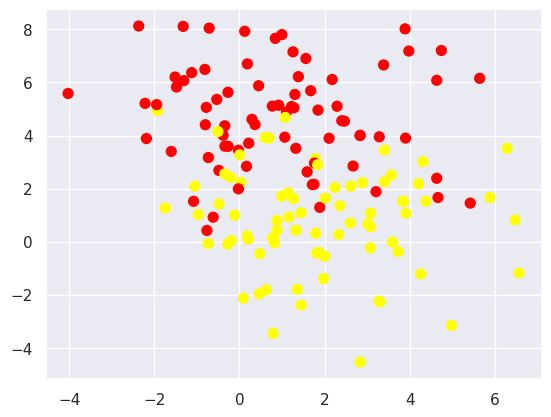

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150, centers=2,
                  random_state=0, cluster_std=1.960)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Будем использовать классификатор опорных векторов Scikit-Learn для обучения решающих деревьев.

class sklearn.tree.**DecisionTreeClassifier**( **criterion**='gini', **splitter**='best', **max_depth**=None, **min_samples_split**=2, **min_samples_leaf**=1, min_weight_fraction_leaf=0.0, **max_features**=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, **class_weight**=None, **ccp_alpha**=0.0)

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier


  Основные параметры класса sklearn.tree.DecisionTreeClassifier:

  - **criterion**: {“gini”, “entropy”, “log_loss”}, default=”gini”
  - **splitter**:{“best”, “random”}
  - **max_depth**: максимальная глубина дерева
  - **max_features**: максимальное число признаков, по которым ищется лучшее разбиение в дереве (это нужно потому, что при большом количестве признаков будет "дорого" искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков)
  - **min_samples_leaf**: минимальное число объектов в листе. У этого параметра есть понятная интерпретация: скажем, если он равен 5, то дерево будет порождать только те классифицирующие правила, которые верны как минимум для 5 объектов
  - **max_features**: int, float или {“auto”, “sqrt”, “log2”}:Ряд особенностей, которые следует учитывать при поиске лучшего сплита:

    - Если int, то учитывайте max_featuresособенности при каждом разделении.

    - Если с плавающей запятой, то max_featuresэто дробь и особенности учитываются при каждом разбиении.max(1, int(max_features * n_features_in_))

    - Если "авто", то max_features=sqrt(n_features).

    - Если «sqrt», то max_features=sqrt(n_features).

    - Если «log2», то max_features=log2(n_features).

    - Если None, то max_features=n_features.

  - **class_weight**: dict, list(словари) или  “balanced”: Веса, связанные с классами в форме . Если None, предполагается, что все классы имеют вес один. Для задач с несколькими выходами список словарей может быть предоставлен в том же порядке, что и столбцы y.{class_label: weight}


  - **ccp_alpha**: Параметр сложности, используемый для сокращения минимальной стоимости-сложности. ccp_alphaБудет выбрано поддерево с наибольшей сложностью стоимости, меньшей чем . По умолчанию обрезка не выполняется.

Параметры дерева надо настраивать в зависимости от входных данных, и делается это обычно с помощью кросс-валидации.


Соберем дерево из "коробки":



In [4]:
from sklearn import tree
from sklearn.model_selection import train_test_split



clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

Отобразим результат:

In [5]:
def plot_dt_decision_function(model, ax=None, plot_support=True, class_numb = 2, n_feat = 2, b = 1.):
    """Plot the decision function for a 2D DT"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # сетка примеров для оценки значений в точках пространства
    n30 = 200 # точность визуализации
    x = np.linspace(xlim[0], xlim[1], n30)
    y = np.linspace(ylim[0], ylim[1], n30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]+[np.ones(n30**2).ravel()*b]*(n_feat-2)).T
    print(xy[[1,100,100, 1000],:])
    P = model.predict_proba(xy)[:,1]
    print(P[[1,100,100, 1000]])
    P =P.reshape(X.shape)


    # отрисуем поля  (по уровням )

    lev = [0.5*k for k in range((class_numb-1)*2+1)]
    #  Создаем массив RGB цветов каждой области:
    color_region = np.zeros(((class_numb-1)*2+1, 3))
    color_region[:, :-1] = 0.4
    color_region[:, 2] = np.linspace(0, 1, (class_numb-1)*2+1)

    ax.contourf(X, Y, P,
            levels = lev,
            colors = color_region, alpha = 0.5)


    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

[[-4.55751667 -5.09981281]
 [-4.55751667  1.83034528]
 [-4.55751667  1.83034528]
 [-4.26459236 -5.1698144 ]]
[1. 0. 0. 1.]


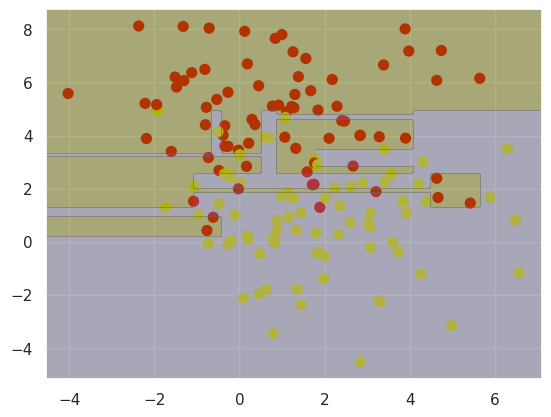

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_dt_decision_function(clf, class_numb = 2);

После обучения вы можете построить дерево с помощью plot_tree функции:

[Text(0.5089285714285714, 0.95, 'node #0\nx[1] <= 2.591\ngini = 0.5\nsamples = 100.0%\nvalue = [0.5, 0.5]'),
 Text(0.23214285714285715, 0.85, 'node #1\nx[1] <= 1.28\ngini = 0.25\nsamples = 50.0%\nvalue = [0.147, 0.853]'),
 Text(0.14285714285714285, 0.75, 'node #2\nx[0] <= -0.446\ngini = 0.083\nsamples = 30.7%\nvalue = [0.043, 0.957]'),
 Text(0.10714285714285714, 0.65, 'node #3\nx[1] <= 0.971\ngini = 0.48\nsamples = 3.3%\nvalue = [0.4, 0.6]'),
 Text(0.07142857142857142, 0.55, 'node #4\nx[1] <= 0.176\ngini = 0.444\nsamples = 2.0%\nvalue = [0.667, 0.333]'),
 Text(0.03571428571428571, 0.45, 'node #5\ngini = 0.0\nsamples = 0.7%\nvalue = [0.0, 1.0]'),
 Text(0.10714285714285714, 0.45, 'node #6\ngini = 0.0\nsamples = 1.3%\nvalue = [1.0, 0.0]'),
 Text(0.14285714285714285, 0.55, 'node #7\ngini = 0.0\nsamples = 1.3%\nvalue = [0.0, 1.0]'),
 Text(0.17857142857142858, 0.65, 'node #8\ngini = 0.0\nsamples = 27.3%\nvalue = [0.0, 1.0]'),
 Text(0.32142857142857145, 0.75, 'node #9\nx[0] <= 4.51\ngini = 0.

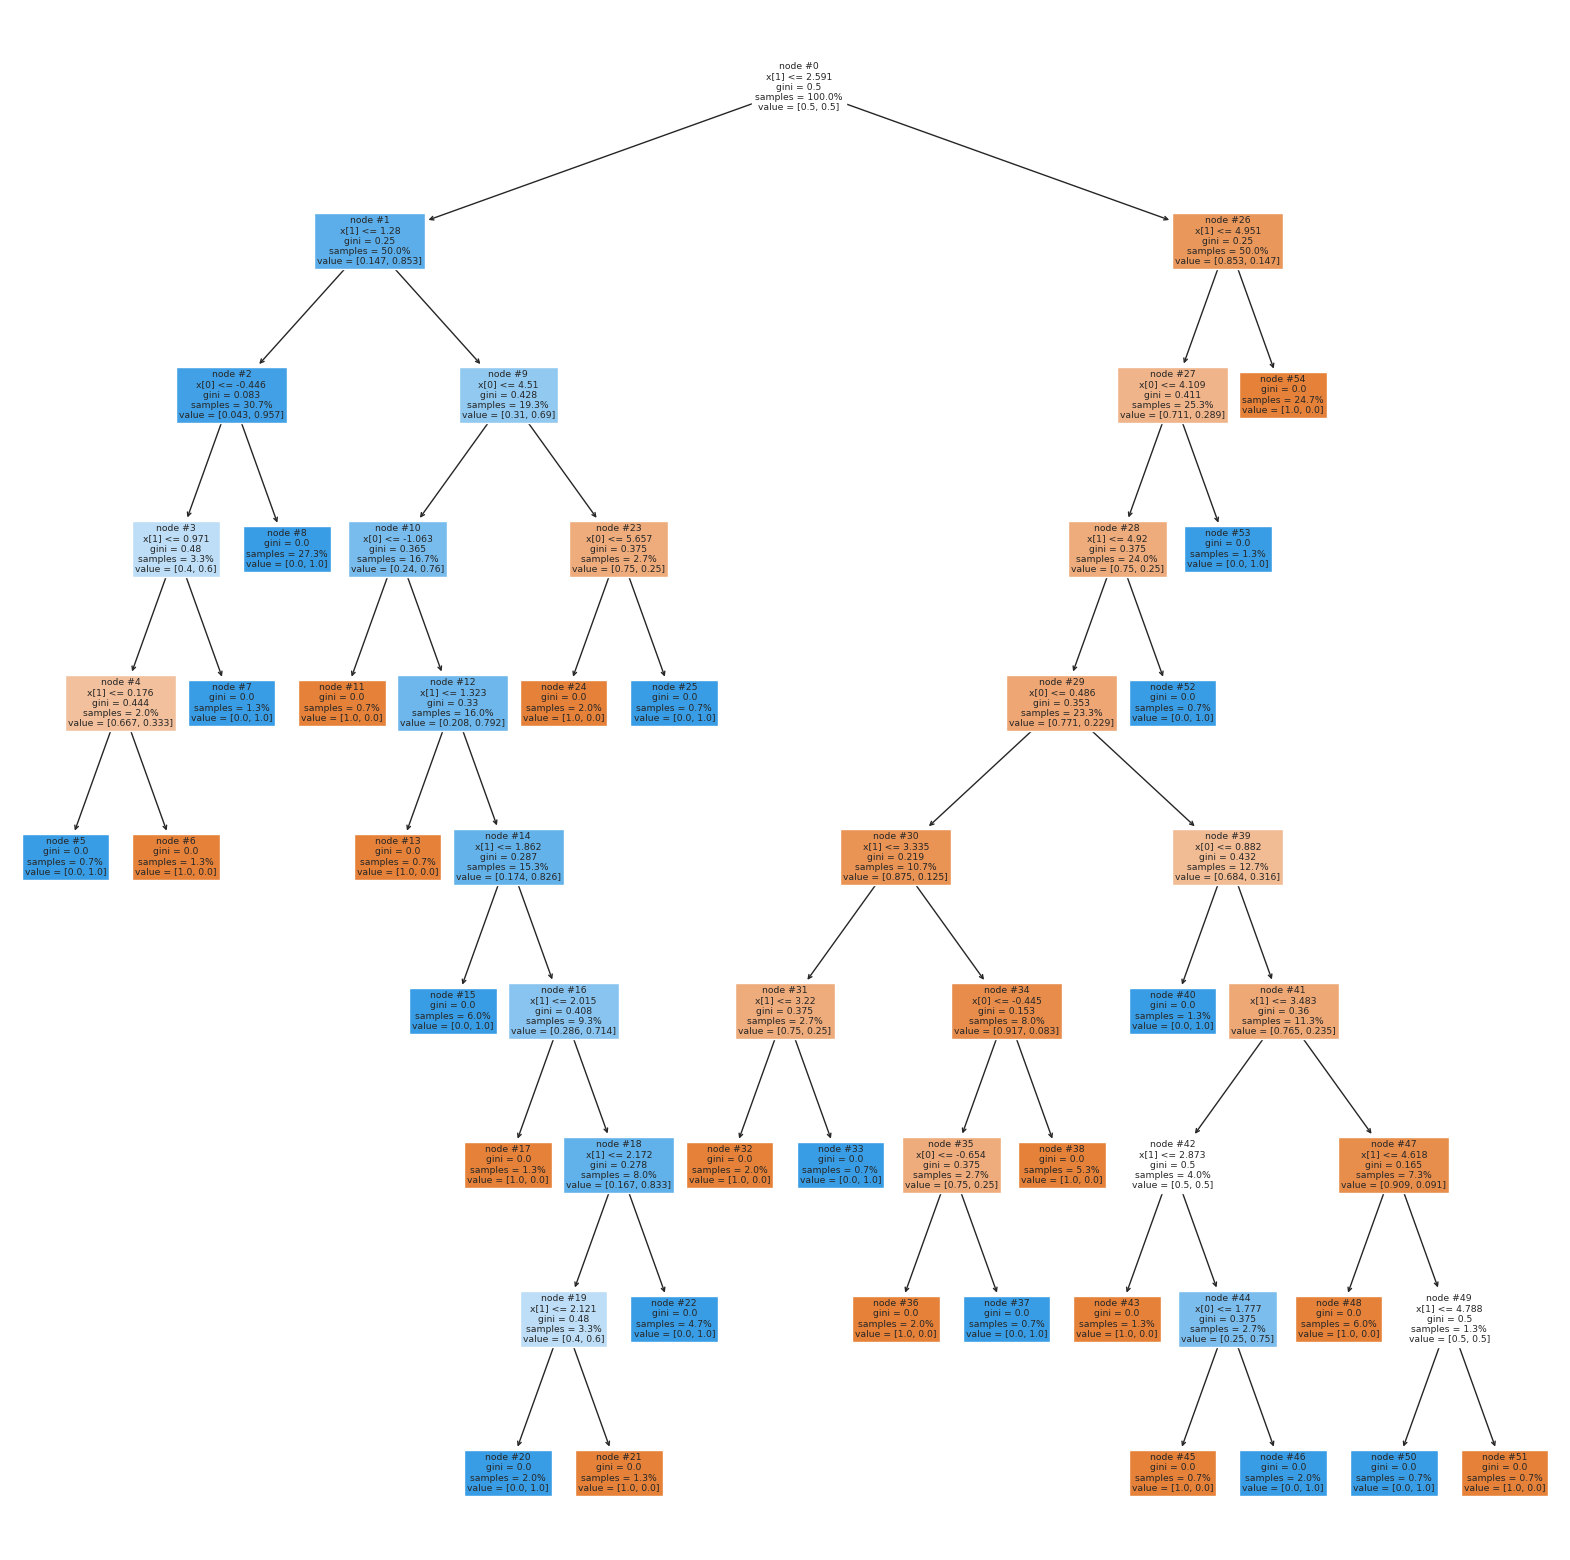

In [7]:
plt.figure(figsize = (20,20))
tree.plot_tree( clf, filled=True, node_ids = True, proportion=True)

Другая визуализация https://graphviz.readthedocs.io/en/stable/manual.html:

In [8]:
!pip install graphviz

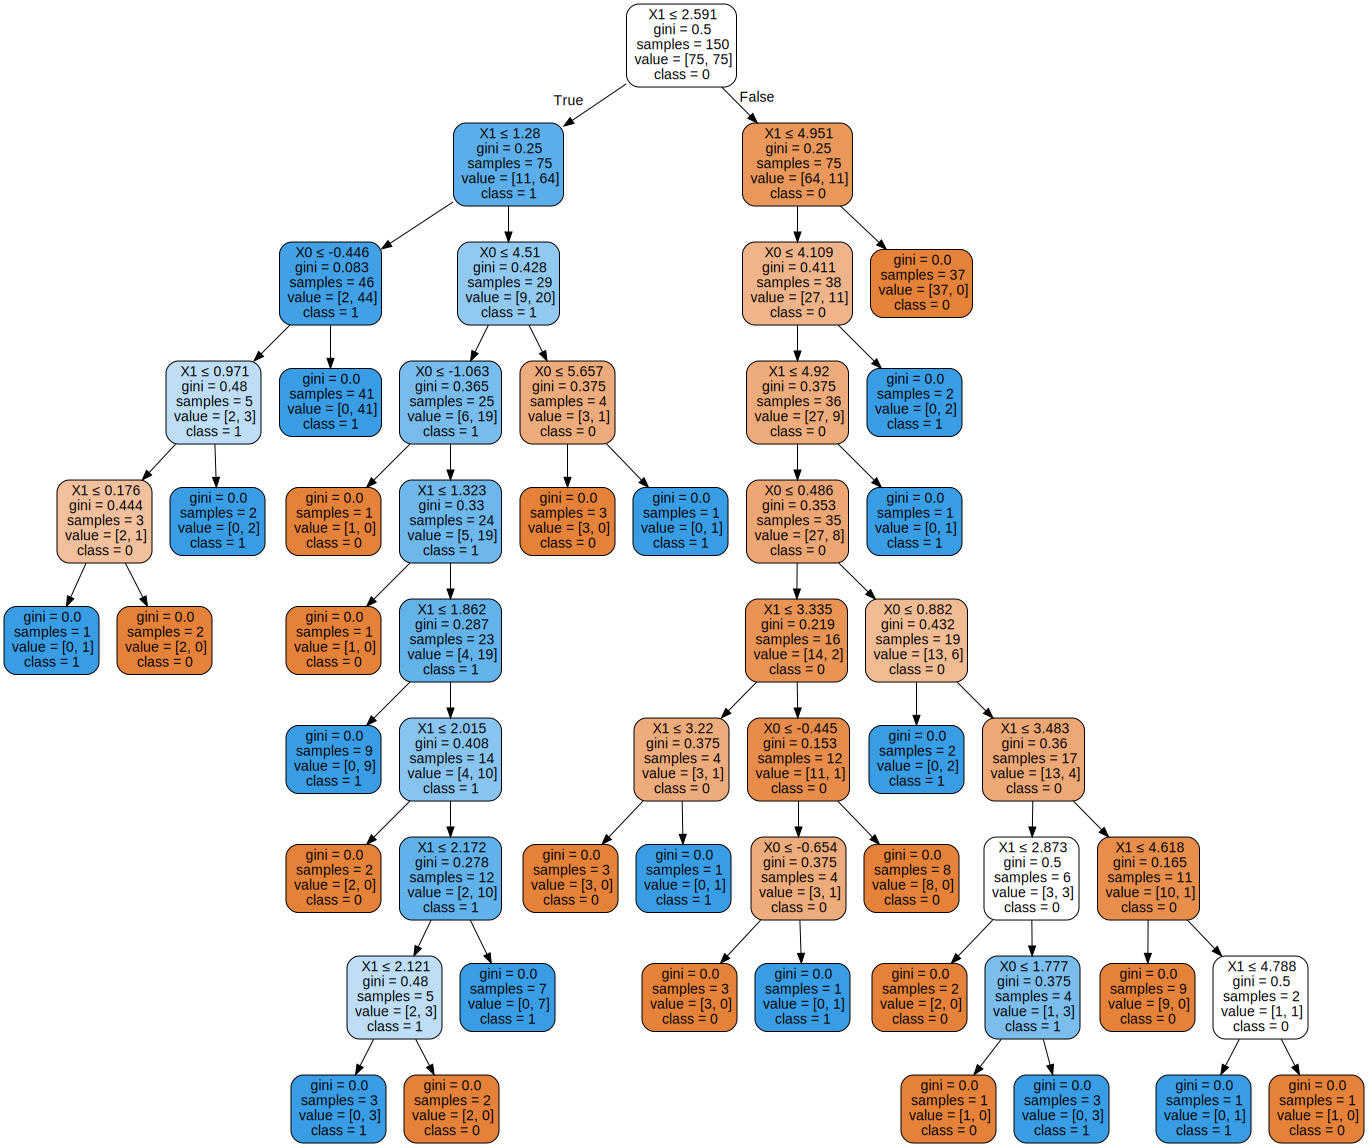

In [9]:
import graphviz
from graphviz import Digraph

dot_data = tree.export_graphviz(clf, out_file=None,feature_names=['X0','X1'],class_names=['0','1'], filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph

### **Задание 1.**

1.1 Оцените визуально изменение положения гиперповерхности для числа точек в обучении N(k) в диапазоне от 10 до 500 в текущем примере для деревьев с глубиной 1,5,..., 50 . Оцените мeтрики для тестового набора: полноту, точность,roc_auc,оцените время работы модели на этапе генерации дерева и этапе получения решений (import time).

1.2 Оцените изменение гиперповерхности после нормализации (coef = coef_ / np.sum(( m1.coef_ ) ** 2) ** 0.5) используем (coef) в форме |coef(к) - coef(к-1)|/coef(k) для разных подмножеств примеров N(k). Оцените мeтрики для тестового набора: полноту, точность,roc_auc


1.3  зафиксируйте результаты в таблице и сделайте выводы

[[-4.5        -5.7000582 ]
 [-4.5         2.0186935 ]
 [-4.5         2.0186935 ]
 [-4.21105528 -5.77802539]]
[1.         0.25806452 0.25806452 1.        ]
[[-4.5        -5.23278377]
 [-4.5         1.83920187]
 [-4.5         1.83920187]
 [-4.21105528 -5.30421796]]
[1. 1. 1. 1.]


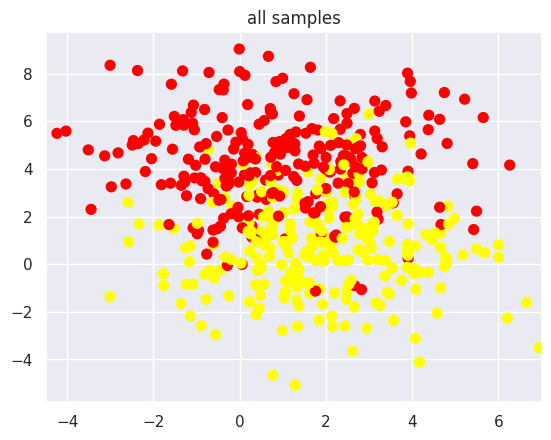

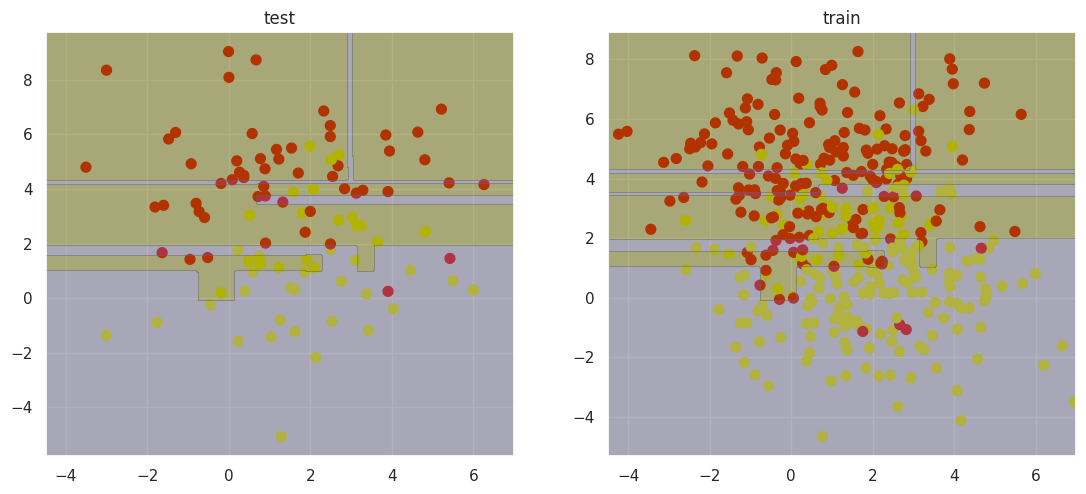

In [10]:

X, y = make_blobs( n_samples=500, centers=2,
                  random_state=0, cluster_std=1.960)
plt.title('all samples')
plt.xlim([-4.5,7])
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
plt.figure(figsize = (13.3,5.5))

plt.subplot(1,2,1)
plt.title('test')
plt.xlim([-4.5,7])
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='autumn')
plot_dt_decision_function(clf, plot_support=False);

plt.subplot(1,2,2)
plt.title('train')
plt.xlim([-4.5,7])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plot_dt_decision_function(clf, plot_support=False);

1.4 повторите п.1.2 для данных ниже и сделайте выводы о качестве разделения.

[[-1.22774807 -1.19292569]
 [-1.22774807 -0.00167745]
 [-1.22774807 -0.00167745]
 [-1.16503306 -1.2049585 ]]
[0. 0. 0. 0.]
[[-1.34768049 -1.28887723]
 [-1.34768049  0.0093528 ]
 [-1.34768049  0.0093528 ]
 [-1.27901259 -1.30199066]]
[0. 0. 0. 0.]


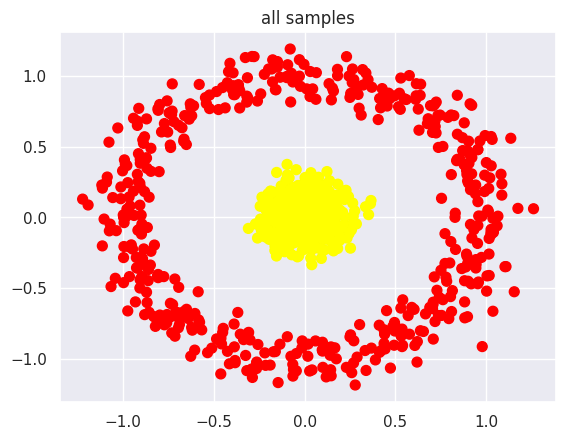

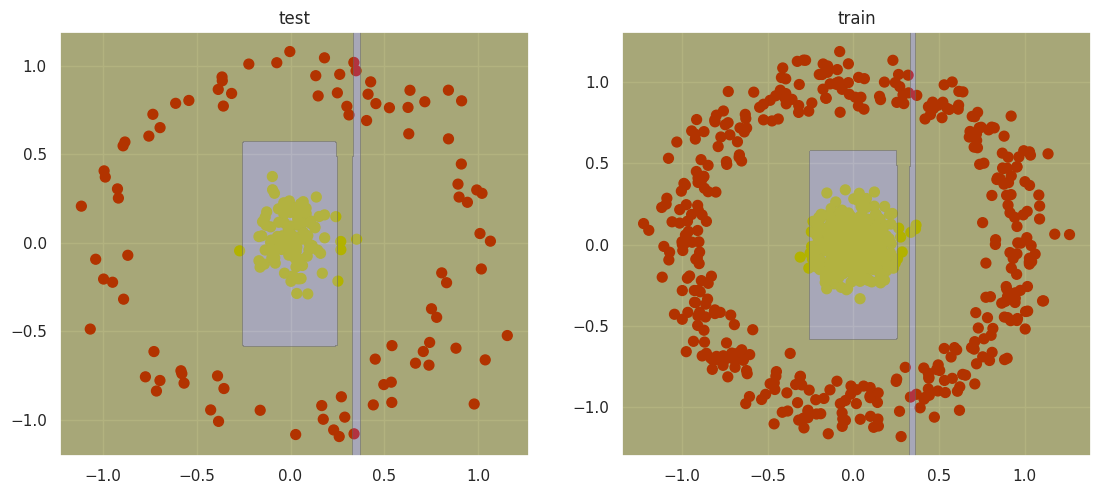

In [11]:
from sklearn.datasets import make_circles

X, y = make_circles( 1000, factor=0.1, noise=0.1) # строим не линейное пространство примеров
plt.title('all samples')
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)

plt.figure(figsize = (13.3,5.5))
plt.subplot(1,2,1)
plt.title('test')

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='autumn')
plot_dt_decision_function(clf, plot_support=False);

plt.subplot(1,2,2)
plt.title('train')

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plot_dt_decision_function(clf, plot_support=False);

Оцениваем качество от глубины и числа примеров:

  1)

  2)

...


### **Задание 2.**

2.1  Проведите эксперимент с изменением гиперпараметров для пространства из примера ниже:
  - max_features: 0.4,0.6, 0.8,1.0,
  - min_samples_leaf:1,5,100
  - splitter:“best”, “random”
  
  и оцените метрики и время.

2.2  зафиксируйте результаты в таблице и сделайте выводы


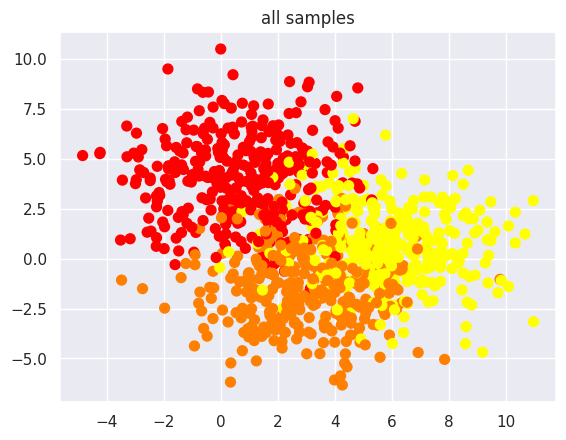

In [12]:
X, y = make_blobs(  n_samples=1000, centers=3,n_features=5,
                  random_state=0, cluster_std=2.0)
plt.title('all samples')

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

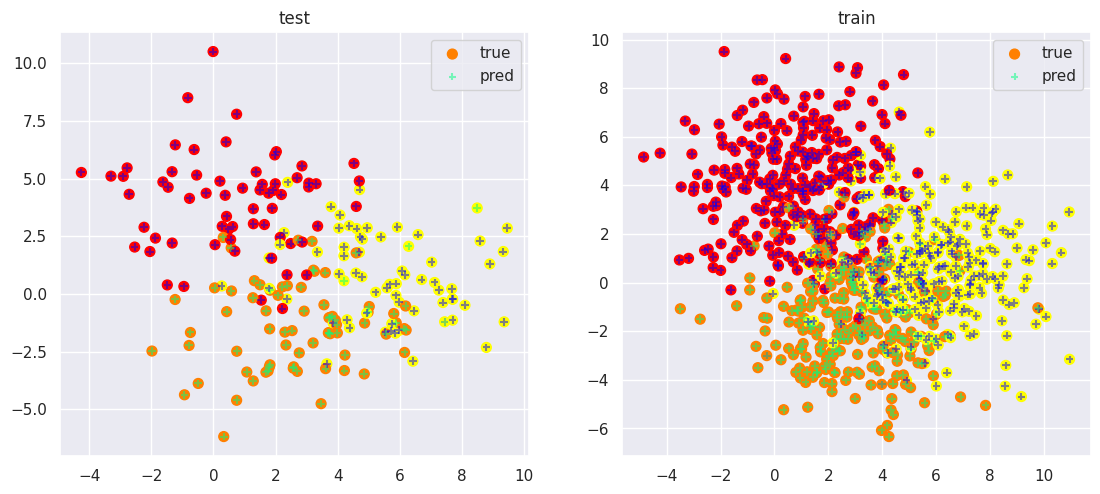

In [13]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


clf = tree.DecisionTreeClassifier(max_depth=5)
y_p = clf.fit(X_train, y_train).predict_proba(X_train)[:,1]
#test
y_pt = clf.predict_proba(X_test)[:,1] # предсказание вероятностной формы класса 1 (диапазон значение от 0 до 1)
y_pt_c = clf.predict(X_test) # предсказание класса (0/1)
plt.figure(figsize = (13.3,5.5))
plt.subplot(1,2,1)
plt.title('test')

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='autumn')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pt, s=30, cmap='winter',alpha=0.5, marker ='+')
plt.legend(['true','pred'])

plt.subplot(1,2,2)
plt.title('train')

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_p, s=30, cmap='winter',alpha=0.5, marker ='+')
plt.legend(['true','pred'])
plt.show()

Не все классы истиной и предиктивной разметки совпали в тесте (и похоже все в тренировке). Делаем оценку метрик:

In [14]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
import sklearn.datasets

In [15]:
print(classification_report(y_test, y_pt_c,
                            target_names=['0','1','2']))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        64
           1       0.95      1.00      0.97        70
           2       0.98      0.94      0.96        66

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.98      0.97      0.97       200



Все классы предсказаны неплохо.

## Регрессия:

Работает через похожий класс (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

class sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)

  - **criterion**:{“squared_error”, “friedman_mse”, “absolute_error”, “poisson”} - немного изменяем критерий для выбора разделения, остальное похоже


In [17]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
# синтетические данные
housing = fetch_california_housing()
X, y = housing.data, housing.target
regressor = DecisionTreeRegressor(max_depth=10,random_state=0)
cross_val_score(regressor, X, y, cv=10)

array([-0.01734538,  0.47218128,  0.60700199,  0.51654696,  0.64815093,
        0.47901784,  0.16744175,  0.37880686,  0.27481048,  0.50438232])

Строим решение как регрессию (метрики из регрессионного пула).

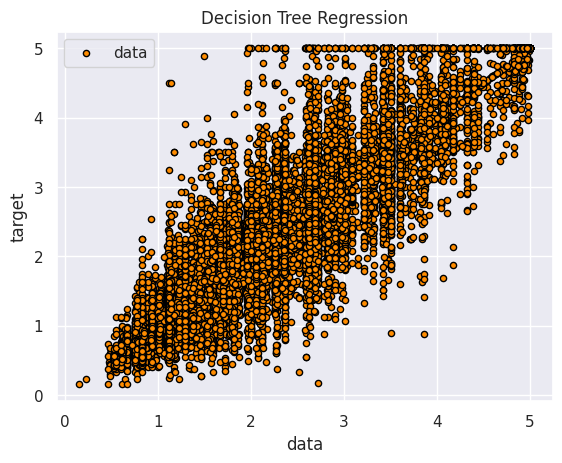

R2:  0.8206970165223322


In [18]:
regressor.fit(X,y)
y_p = regressor.predict(X)

# Plot the results
plt.figure()
n_f = 4
plt.scatter(y_p, y, s=20, edgecolor="black", c="darkorange", label="data")
#plt.plot(X[:,n_f], y_p, "+", label="max_depth=2", linewidth=2)

# покажем связь предсказанного с истиным выходом регрессии
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()
# метрика регрессии (коэффициент детерминации)
print('R2: ', r2_score(y,y_p))



Посмотрите на визуализацию части данных (500 примеров). Что характерное для регрессий в форме дерева видите со стороны предсказанных значений?

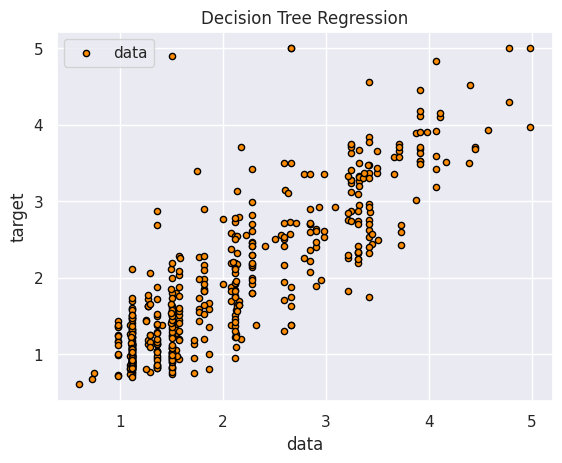

In [20]:
plt.figure()
n_f = 4
plt.scatter(y_p[:500], y[:500], s=20, edgecolor="black", c="darkorange", label="data")
#plt.plot(X[:,n_f], y_p, "+", label="max_depth=2", linewidth=2)

# покажем связь предсказанного с истиным выходом регрессии
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### **Задание 3.**

3.1. для вариантов:
  -  X, color = datasets.make_s_curve(1000 * n, random_state=0)
  -  X, color = datasets.make_s_curve(50 * n, random_state=0)
  - n - номер варианта
  
  разделить данные в пропорции 4:1 и построить решение с изменением глубины дерева от 1 до 20 и оценить коэффициент детерминации (R2)

3.2. построить график зависимоти R2(глубина дерева). Сделать вывод о качестве модели и необходимой глубине дерева   

### **Задание 4.**

Построить последовательность обработки примеров для набора "fetch_lfw_people":

 4.1. провести генерацию классификатора дерево решений для 3 вариантов:

    - изменяем глубину дерева: 1,3,5,10,20,50

    - используем варианты выбора признака для разделения как: "best" , "random"

    - изменть размер РСА (сейчас 150 компонент , проверить : 50, 100, 200 )

 4.2. выбрать наиболее эффективное сочетание параметров из полученных моделей по f1_score

 4.3 провести анализ результата (метрики) и сравнить с результатом логистической регрессии

**Загрузка данных и включение в работу fetch_lfw_people**:




In [21]:
from sklearn.datasets import fetch_lfw_people # изображения лиц людей (медийно известные персоны)
faces = fetch_lfw_people(min_faces_per_person=60)  # берем 60 фотографий на персону
print(faces.target_names)  #  покажем список полученых персон
print(faces.images.shape)  #  размеры данных (картинки 62 на 47 пикселей)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Задача представляет 8 классов, т.е. нужно использовать многоклассовую версию  SVM Classifier: SVC c 'ovr'


Каждый пример содержит 62 * 47 пикселей - таким образом исходных ("сырых") признаков очень много. Сделаем стандартную обработку с целью понизить размерность данных (используем РСА преобразование - https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca - его особенности обсудим позднее. Пока важно, что из 62 * 47 признаков получим 150 признаков, что уже подходит для работы в пространстве примеров. где всего 1348 объектов )


Кроме того , используем механизм конвейеров обработки (пайплайны https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html ). Для этого существует специализированный класс Pipeline, который позволяет объединять отдельные этапы обработки данных (преобразования и обучение ) в один общий объект. Этот общий объект можно создавать разными способами. тут используем  функцию make_pipeline, куда передаем созданные объекты преобразования данных и классификатор (pca, clf).

Визуализируем примеры из набора данных:



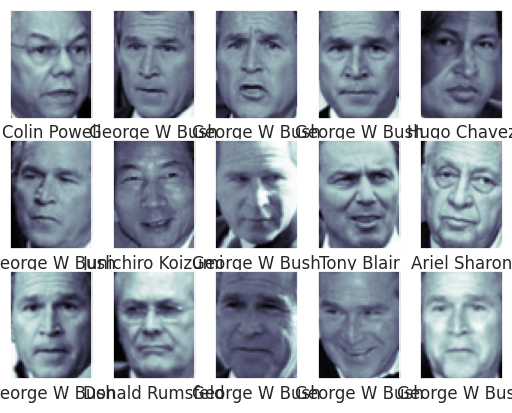

In [22]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Готовим данные для обучения и теста:

In [23]:

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline # сборка конвейера обработки.

# сделаем преобразование
pca = PCA(n_components=150, whiten=True, random_state=42)
clf = tree.DecisionTreeClassifier (class_weight='balanced')


In [24]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

pca.fit(Xtrain)

PCA(n_components=150, random_state=42, whiten=True)

Для поиска хорошей комбинации параметров пользуемся методом **случайного** перебора случайных вариантов из списка. работает быстрее чем сеточный поиск (просмотрит заранее заданное число вариантов гиперпараметров) но не обязательно найдет лучшее сочетание (что может сделать  **сеточный поиск**).

Запустим механизм случайного поиска для формирования наиболее эффективного набора гиперпараметров алгоритм:
  
  - используем объект RandomizedSearchCV(случайный поиск https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV)
  - в качестве пространства поиска зададим список параметров:
      - {'max_depth': [1, 5, 7,10,12,20, 50],
              'max_features': [0.1, 0.5, 0.7, 0.9]}


  Итогом работы этого объекта является комбинация параметров (.best_params_) с лучшей оценкой и наиболе качественная модель (.best_estimator_)
  
  Работает сравнительно быстро!!!     

In [25]:
from sklearn.model_selection import  RandomizedSearchCV  # для создания механизма random поиска.
param_grid = {'max_depth': [1, 5, 7,10,12,20, 50],
              'max_features': [0.1, 0.5, 0.7, 0.9]}
grid = RandomizedSearchCV(clf, param_grid)  # создаем объект для сеточного поиска.

%time grid.fit(pca.transform(Xtrain), ytrain)  # проводим сеточный поиск лучшей модели по гиперпараметрам
#print(grid.best_params_)  # лучшие параметры



CPU times: user 3.3 s, sys: 151 ms, total: 3.45 s
Wall time: 3.31 s


RandomizedSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
                   param_distributions={'max_depth': [1, 5, 7, 10, 12, 20, 50],
                                        'max_features': [0.1, 0.5, 0.7, 0.9]})

Лучшие параметры:

In [26]:
grid.best_params_

{'max_features': 0.7, 'max_depth': 50}

Проверяем качество на тестовых примерах

In [27]:
model = grid.best_estimator_  # лучшая модель по версии сеточного поиска (уже обучена в процессе сеточного поиска)
yfit = model.predict(pca.transform(Xtest))  # применяем эту модель к нашим тестам


Визуализируем тесты:

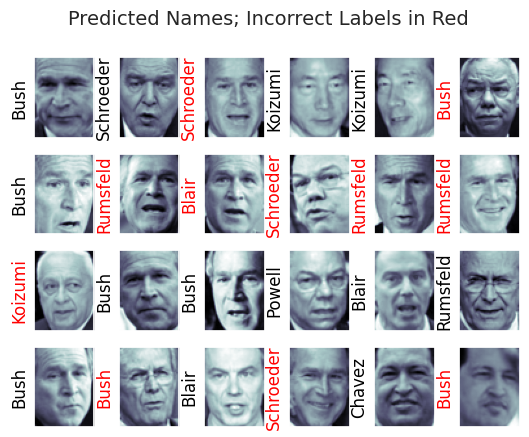

In [28]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

Заодно смотрим на тренировочном наборе:

In [29]:
yfit_tr = model.predict(pca.transform(Xtrain))

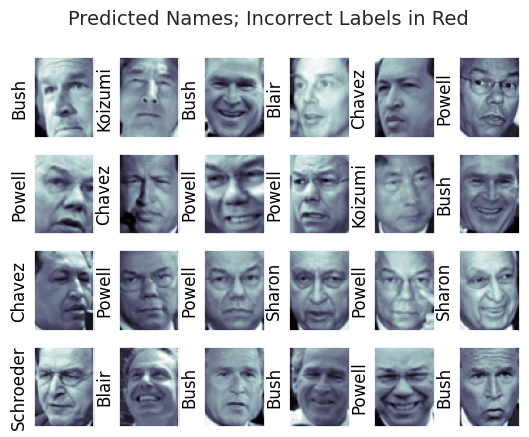

In [30]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtrain[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit_tr[i]].split()[-1],
                   color='black' if yfit_tr[i] == ytrain[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

Ошибает. но значительно меньше. Посчитаем метрики.

Оцениваем результаты по всем классам на тестах:

In [32]:
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.24      0.33      0.28        15
     Colin Powell       0.44      0.41      0.43        68
  Donald Rumsfeld       0.21      0.23      0.22        31
    George W Bush       0.50      0.41      0.45       126
Gerhard Schroeder       0.29      0.43      0.34        23
      Hugo Chavez       0.36      0.20      0.26        20
Junichiro Koizumi       0.38      0.67      0.48        12
       Tony Blair       0.31      0.36      0.33        42

         accuracy                           0.38       337
        macro avg       0.34      0.38      0.35       337
     weighted avg       0.40      0.38      0.39       337



Очень слабая генерализация модели : **слишком глубокое дерево?** - проверьте , уменьшая глубину от найденого лучшего сочетания параметров:

Строим матрицу ошибок:

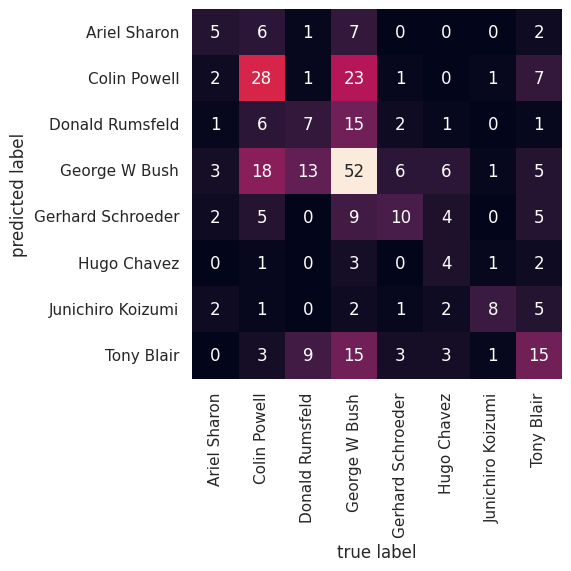

In [33]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Главная диагональ - верные классификации, а все вне этой диагонали разнородные ошибки (как оценки модели принимают один тип объектов за другой)

Что-то реально нашли только в трех классах.

### **Задание 5.**

Самостоятельно оценить данные по варианту (или любой рабочий набор данных для классификации с числом объектов больше 500):

In [35]:
from  sklearn import datasets

In [36]:
V1 = datasets.load_wine()
V2 = datasets.load_digits()
V3 = datasets.load_breast_cancer()
V4 = datasets.make_classification(n_samples = 10000, n_features=5, n_redundant=2, n_informative=2,random_state=10, n_clusters_per_class=2)
V5 = datasets.fetch_covtype(return_X_y=True)
V6 = datasets.make_blobs(n_samples=10000, centers=2, n_features=5, random_state=10)
V7 = datasets.make_circles(n_samples=10000, factor=0.5, noise=0.05)
V8 = datasets.make_moons(n_samples=10000, noise=0.05)

Сравнить с результатом логистической регрессии, svm, knn.

 5.1.Загрузить данные  по варианту

 5.2.Построить классификатор решающее дерево в формате sklearn  .

 5.3. Выбрать метрику (учитываем балансировку данных и смысл задачи) и оценить качество модели на отложенной выборке

 5.4. сделать выводы о качестве для модели на основе выбранной метрики

 5.5. Привести все признаки к одному диапазону (0,1) (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) или провести стандартизацию признаков (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) , построить модель в sklearn и оценить метрики на отложеной выборке

 5.6. Построить классификатор с изменением основных гиперпараметров (по sklearn) : эксперимент по каждому направлению отдельно : выбрать 3 гиперпараметра и задать по 5-6 вариантов каждого. Зафиксировать в каждом эксперименте(при изменении одного из параметров) accuracy, f1,точность, полнота, РR_auc,  ROC_auc в таблице результатов.

 5.7 Сделать выводы о качестве модели

# **Ансамбли**

## Алгоритм построения случайного леса

При построении случайного леса вначале генерируется количество бутстрап-выборок, равное количеству деревьев в алгоритме. Для уменьшения корреляции базовых алгоритмов рандомизируют сам процесс построения каждого дерева: если в стандартном методе построения деревьев мы в каждом узле выбираем $j$-й признак и порог $t$, с которым сравнивается его значение, и потом эти значения оптимизируются с помощью функции ошибки, то в методе случайного леса в каждой вершине $j$-й признак выбирается не из всего пространства признаков, а из его случайного подмножества размера $m$, __которое каждый раз выбирается заново__ (в этом отличие от метода случайных подпространств, где подпространство выбирается единожды и используется для построения всего дерева).

Sklearn реализация https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

## Алгоритм градиентного бустинга (GBM)

Есть некоторые практически рекомендации по построению случайных лесов: в задачах классификации рекомендуется брать $m = \sqrt{d}$, где $d$ - общее число признаков, и строить дерево до тех пор, пока в каждом листе не останется по одному объекту, а в задаче регрессии принимать $m = d/3$ и строить дерево, пока в листьях не останется по пять объектов.

Далее построенные деревья объединяются в композицию, и при предсказаниях с его помощью используется усредненный ответ на каждом дереве.


Итоговый алгоритм ищется в виде взвешенной суммы базовых алгоритмов (обратите внимание: не среднего, а суммы):

$$a_{N}(x) = \sum^{N}_{n=1}\gamma_{n}b_{n}(x).$$

Так как ансамбль строится итеративно, нужно вначале обучить первый простой алгоритм:

$$b_{1}(x) = \underset{b}{\text{argmin}}\frac{1}{l}\sum_{i=1}^{l}(b(x_{i}) - y_{i})^{2}.$$


После того, как нашли первый алгоритм $b_{1}(x)$, нам нужно добавить в ансамбль еще один алгоритм $b_{2}(x)$. Для начала найдем разницу ответов первого алгоритма с реальными ответами:

$$s_{i}^{(1)} = y_{i} - b_{1}(x_{i}).$$

Если прибавить эти значения к полученным предсказаниям, получим идеальный ответ. Таким образом, новый алгоритм логично обучать так, чтобы его ответы были максимально близки к этой разнице, чтобы при их прибавлении к ответам первого алгоритма мы получили близкие к реальным. Значит, второй алгоритм будет обучаться на следующем функционале ошибки:

$$b_{2}(x) = \underset{b}{\text{argmin}}\frac{1}{l}\sum_{i=1}^{l}(b(x_{i}) - s_{i}^{(1)})^{2} = \underset{b}{\text{argmin}}\frac{1}{l}\sum_{i=1}^{l}(b(x_{i}) - (y_{i} - b_{1}(x_{i})))^{2}.$$

Каждый следующий алгоритм также настраивается на остатки композиции из предыдущих алгоритмов:

$$b_{N}(x) = \underset{b}{\text{argmin}}\frac{1}{l}\sum_{i=1}^{l}(b(x_{i}) - s_{i}^{(N)})^{2},$$

$$s_{i}^{(N)} = y_{i} - \sum_{n=1}^{N-1}b_{n}(x_{i}) = y_{i} - a_{N-1}(x_{i}).$$

Таким образом, каждый новый алгоритм корректирует ошибки предыдущих, и так продолжается до момента получения приемлемой ошибки на композиции. Вектор коэффициентов $s$ при этом называют _вектором сдвига_.

Выбор сдвига из условия $s_{i} = y_{i} - a_{N-1}(x_{i})$ требует точного совпадения полученных предсказаний и ответов, однако, в более общем случае вектор сдвига принимают с учетом особенностей используемой в данном случае функции потерь: вектор сдвига должен ее минимизировать, то есть направлять в сторону уменьшения. Как мы помним из метода градиентного спуска, направление наискорейшего убывания функции совпадает с ее антиградиентом. Таким образом, если при обучении мы минимизируем функционал ошибки $L(y,z)$

$$\sum_{i=1}^{l}L(y_{i}, a_{N-1}(x_{i}) + s_{i}) \rightarrow \underset{s}{\text{min}},$$

сдвиг на каждом шаге должен быть противоположен производной функции потерь в точке $z = a_{N-1}(x_{i})$.

$$s_{i} = \left.-\frac{\partial L}{\partial z} \right|_{z = a_{N-1}(x_{i})}.$$

Каждый новый алгоритм таким образом выбирается так, чтобы как можно лучше приближать антиградиент ошибки на обучающей выборке.

После того, как мы вычислили требуемый для минимизации ошибки сдвиг $s$, нужно настроить алгоритм $b_{N}(x)$ так, чтобы он давал максимально близкие к нему ответы, то есть обучать его именно на вектор сдвига. Близость ответов алгоритма к сдвигу обычно оценивается с помощью среднеквадратичной ошибки независимо от условий исхожной задачи (так как исходно используемая функция потерь $L$ уже учтена в сдвигах $s_{i}$):

$$b_{N}(x) = \underset{s}{\text{argmin}}\frac{1}{l}\sum_{i=1}^{l}(b(x_{i})-s_{i})^{2}.$$


Коэффициент $\gamma$ для найденного алгоритма также находится по аналогии с наискорейшим градиентным спуском:

$$\gamma_{N} = \underset{\gamma}{\text{argmin}}\sum_{i=1}^{l}L(y_{i},a_{N-1}(x_{i}) + \gamma b_{N}(x_{i})).$$

Обычно в качестве функции потерь в задачах регрессии принимается квадратичная

---

функция потерь ($L_{2}$ loss):

$$L(y, z) = (y-z)^{2},$$

его производная по $z$ примет вид

$$L'(y, z) = 2(z-y)$$

или модуль отклонения ($L_{1}$ loss)

$$L(y, z) = |y-z|,$$

его производная по $z$ будет иметь вид

$$L'(y, z) = \text{sign}(z-y).$$

В случае классификации - логистическая функция потерь:

$$L(y, z) = log(1 + exp(-yz))$$

ее производная:

$$L'(y, z) = \frac{y_{i}}{1+exp(-yz)}.$$

Следует помнить, что компоненты $s_{i}$, вычисляемые через эти производные, берутся с минусом.


Аналогично алгоритму градиентного спуска, имеет смысл добавлять ответ каждого нового алгоритма не полностью, а с некоторым шагом $\eta \in (0, 1]$, так как базовые алгоритмы обычно достаточно простые (например, деревья малой глубины), и они могут плохо приближать вектор антиградиента, и тогда вместо приближения к минимуму мы будем получать случайное блуждание в пространстве. В градиентном бустинге такой прием называется сокращением шага.

$$a_{N}(x) = a_{N-1}(x) + \eta \gamma_{N} b_{N}(x).$$

Градиентный бустинг склонен к переобучению при увеличении числа итераций $N$ или глубины входящих в него деревьев. Стоит об этом помнить при построении алгоритма и выбирать оптимальные параметры по отложенной выборке или с помощью кросс-валидации.


В конечном итоге алгоритм построения модели градиентного бустинга заключается в следующих шагах:

__1.__ Для инициализации выбирается произвольный простой алгоритм $b_{0}(x)$, в его роли можно брать обычные константные алгоритмы: в случае задачи регрессии это может быть

$$b_{0}(x) = 0$$

или среднее значение по всем объектам обучающей выборки

$$b_{0}(x) = \frac{1}{l}\sum_{i=1}^{l}y_{i};$$

в случае классификации - самый часто встречающийся в выборке класс

$$b_{0}(x) = \underset{y}{\text{argmax}}\sum_{i=1}^{l}[y_{i} = y].$$

__2.__ Для каждой итерации вычисляется вектор сдвига $s$:

$$s = \left ( \left.-\frac{\partial L}{\partial z} \right|_{z = a_{n-1}(x_{1})},...,\left.-\frac{\partial L}{\partial z} \right|_{z = a_{n-1}(x_{l})}\right );$$

находится алгоритм

$$b_{n}(x) = \underset{s}{\text{argmin}}\frac{1}{l}\sum_{i=1}^{l}(b(x_{i})-s_{i})^{2};$$

находится оптимальный коэффициент $\gamma$

$$\gamma_{n} = \underset{\gamma}{\text{argmin}}\sum_{i=1}^{l}L(y_{i},a_{n-1}(x_{i}) + \gamma b_{n}(x_{i})).$$

и добавляется в имеющийся ансамбль с умножением на шаг $\eta$, называемый _скоростью обучения_ (опционно)

$$a_{n}(x) = a_{n-1}(x) + \eta \gamma_{n} b_{n}(x).$$

__3.__ При достижении критериев остановки компонуется итоговая модель.


In [37]:
!pip install xgboost
!pip install lightgbm
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.8 MB/s eta 0:00:00


In [51]:
import xgboost as xgb, lightgbm as lgbm, catboost as catb
from sklearn.ensemble import GradientBoostingClassifier

In [45]:

def get_classification_report(target_names, y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    mat = pd.crosstab(y_test_true, y_test_pred)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names,
            yticklabels=target_names)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()

## **Пакеты для использования градиентного бустинга:**

**sklearn  - GradientBoostingClassifier**

sklearn.ensemble.GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

  - loss{‘log_loss’, ‘exponential’}, default=’log_loss’ - варианты потерь, которые можно использовать для работы

  - learning_rate : float, default=0.1 - скорость обучения

  - n_estimatorsint, default=100 - число оценщиков (подмоделей или число шагов дополнения модели вцелом)

ПАРАМЕТРЫ ДЕРЕВЬЕВ:

  - subsample : float, default=1.0 - доля примеров для одного дерева

  - criterion{‘friedman_mse’, ‘squared_error’}, default=’friedman_mse’
 метод оценки сплита в узле дерева



  - min_samples_split, default=2 - минимальное число примеров в сплите

  - min_samples_leaf : int or float, default=1 - минимальное число примеров в листе

  max_depth : int or None, default=3 - максимальная глубина дерева


https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

TRAIN

              precision    recall  f1-score   support

           0       0.85      0.63      0.72        62
           1       0.80      0.80      0.80       168
           2       0.76      0.71      0.74        90
           3       0.81      0.89      0.85       404
           4       0.73      0.73      0.73        86
           5       0.53      0.39      0.45        51
           6       0.57      0.48      0.52        48
           7       1.00      1.00      1.00       102

    accuracy                           0.80      1011
   macro avg       0.76      0.70      0.73      1011
weighted avg       0.79      0.80      0.79      1011

TEST

              precision    recall  f1-score   support

           0       0.17      0.20      0.18        15
           1       0.56      0.53      0.55        68
           2       0.25      0.19      0.22        31
           3       0.60      0.73      0.66       126
           4       0.42      0.35      0.38        23
           

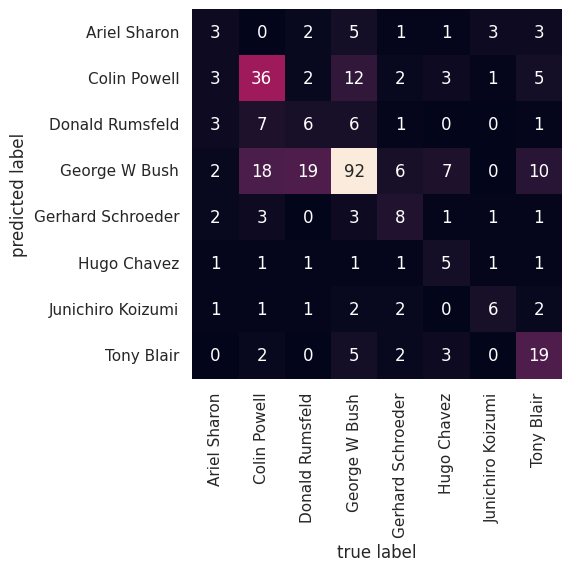

In [52]:
model_sk = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
model_sk.fit(pca.transform(Xtrain), ytrain)

y_train_pred = model_sk.predict(pca.transform(Xtrain))
y_test_pred = model_sk.predict(pca.transform(Xtest))

get_classification_report(faces.target_names, ytrain, y_train_pred, ytest, y_test_pred)

**XGBoost Scikit-Learn API**

Использование XGBoost в стиле Scikit-Learn (можно и в другой форме -  в собственном формате описания данных и обращения к функциям)

https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn

Параметры
:
  - n_estimators ( необязательно [ int ] ) – количество деревьев. Эквивалентно количеству раундов работы.

  - max_deep ( Необязательно [ int ] ) – Максимальная глубина дерева для базовых решателей.

  - max_leaves – Максимальное количество листьев; 0 означает отсутствие ограничений.

  - Learning_rate ( необязательный [ float ] ) – скорость обучения (xgb «eta»)

Параметры генерации делревьев ансамбля:

  - colsample_bytree ( Необязательно [ float ] ) – доля столбцов подвыборки при построении каждого дерева.

  - colsample_bylevel ( Необязательно [ float ] ) – доля столбцов подвыборки для каждого уровня.

  - colsample_bynode ( необязательный [ float ] ) – доля столбцов подвыборки для каждого разделения

TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00       168
           2       1.00      1.00      1.00        90
           3       1.00      1.00      1.00       404
           4       1.00      1.00      1.00        86
           5       1.00      1.00      1.00        51
           6       1.00      1.00      1.00        48
           7       1.00      1.00      1.00       102

    accuracy                           1.00      1011
   macro avg       1.00      1.00      1.00      1011
weighted avg       1.00      1.00      1.00      1011

TEST

              precision    recall  f1-score   support

           0       0.78      0.47      0.58        15
           1       0.78      0.78      0.78        68
           2       0.75      0.48      0.59        31
           3       0.68      0.91      0.78       126
           4       0.58      0.48      0.52        23
           

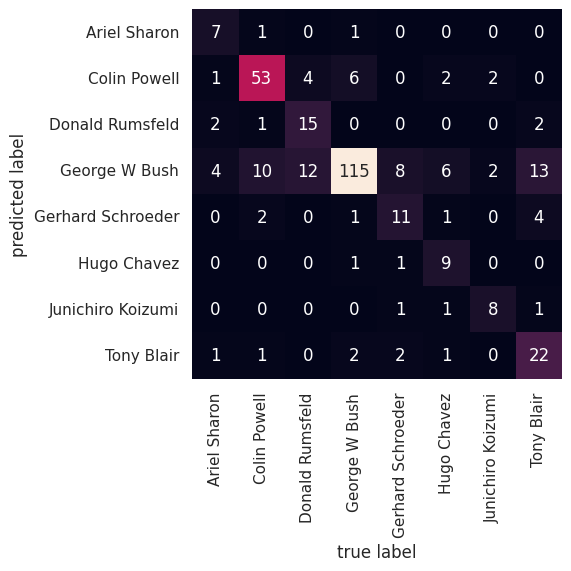

In [47]:
model_xgb = xgb.XGBClassifier()
model_xgb.fit(pca.transform(Xtrain), ytrain) # обучение

y_train_pred = model_xgb.predict(pca.transform(Xtrain))
y_test_pred = model_xgb.predict(pca.transform(Xtest))

get_classification_report(faces.target_names, ytrain, y_train_pred, ytest, y_test_pred)

**LightGBM**

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html

lightgbm.LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=None, importance_type='split', **kwargs)

**Параметры**
:
  - boosting_type ( str , необязательный ( default='gbdt' ) ) – 'gbdt', градиентный спуск  на деревьях решений. «dart» - "Multiple Additive Regression Trees". 'rf' - Случайный лес.

  - num_leaves ( int , необязательный ( по умолчанию=31 ) ) — Максимальное количество листьев дерева для базовых оценщиков.

  - max_глубина ( int , необязательный ( по умолчанию=-1 ) ) — максимальная глубина дерева для базовых оценщиков, <=0 означает отсутствие ограничений.

  - Learning_rate ( float , необязательно ( по умолчанию=0,1 ) ) — скорость обучения.

  - n_estimators ( int , необязательный ( default=100 ) ) – количество подходящих оценщиков.

  - subsample_for_bin ( int , необязательный ( default=200000 ) ) – количество выборок для построения интервалов.

  - objective ( str , callable или None , необязательно ( default=None ) ) — пользовательскую целевую функцию или целевая задача из доступных в пакете. По умолчанию: «regression» для LGBMRegressor, ‘binary’ oили ‘multiclass’ для LGBMClassifier, «lambdarank» для LGBMRanker.

  - class_weight ( dict , 'balanced' или None , необязательно ( default=None ) ) – веса, связанные с классами (словарь)

  - subsample ( float , необязательный ( default=1. ) ) — доля подвыборки для оценщика.

  - colsample_bytree ( float , необязательный ( default=1. ) ) – доля столбцов подвыборки при построении каждого дерева.

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011642 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38250
[LightGBM] [Info] Number of data points in the train set: 1011, number of used features: 150
[LightGBM] [Info] Start training from score -2.791561
[LightGBM] [Info] Start training from score -1.794731
[LightGBM] [Info] Start training from score -2.418886
[LightGBM] [Info] Start training from score -0.917280
[LightGBM] [Info] Start training from score -2.464348
[LightGBM] [Info] Start training from score -2.986870
[LightGBM] [Info] Start training from score -3.047494
[LightGBM] [Info] Start training from score -2.293722
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

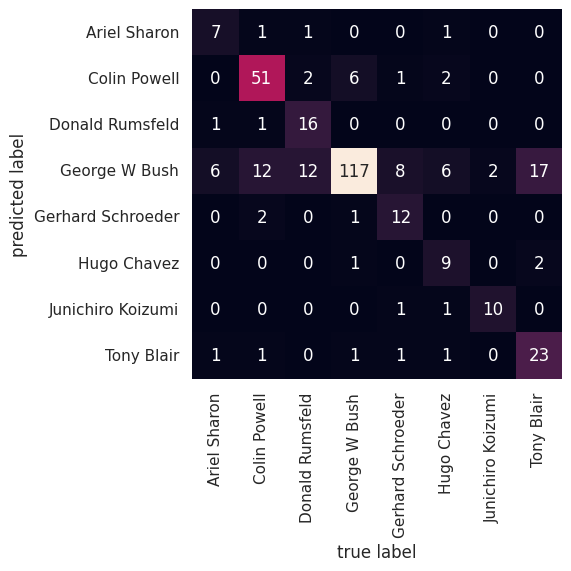

In [55]:
model_lgbm = lgbm.LGBMClassifier()
model_lgbm.fit(pca.transform(Xtrain), ytrain) # обучение

y_train_pred = model_lgbm.predict(pca.transform(Xtrain))
y_test_pred = model_lgbm.predict(pca.transform(Xtest))

get_classification_report(faces.target_names, ytrain, y_train_pred, ytest, y_test_pred)

**CatBoost**

  - CatBoost позволяет проводить обучение на нескольких GPU.
  - Библиотека позволяет получить отличные результаты с параметрами по умолчанию, что сокращает время, необходимое для настройки гиперпараметров.
  - Обеспечивает повышенную точность за счет уменьшения переобучения.
  - Возможность быстрого предсказания с применением модели CatBoost;
  - Умеет под капотом обрабатывать пропущенные значения.
  - Может использоваться для регрессионных и классификационных задач.

**параметры:**

  - loss_function или objective – показатель, используемый для обучения. Есть регрессионные показатели, такие как среднеквадратичная ошибка для регрессии и logloss для классификации.
  - eval_metric – метрика, используемая для обнаружения переобучения.
  - Iterations – максимальное количество построенных деревьев, по умолчанию 1000. Альтернативные названия num_boost_round, n_estimators и num_trees.
  - learning_rate или eta – скорость обучения, которая определяет насколько быстро или медленно модель будет учиться. Значение по умолчанию обычно равно 0.03.

  - l2_leaf_reg или reg_lambda – коэффициент при члене регуляризации L2 функции потерь. Значение по умолчанию – 3.0.
  - bootstrap_type – определяет метод сэмплинга весов объектов, например это может быть Байес, Бернулли, многомерная случайная величина или Пуассон.
  - depth = глубина дерева.
  - min_data_in_leaf или min_child_samples – это минимальное количество обучающих сэмплов в листе. Этот параметр используется только с политиками роста Lossguide и Depthwise.
  - max_leaves или num_leaves – этот параметр используется только с политикой Lossguide и определяет количество листьев в дереве.
  - ignored_features — указывает на признаки, которые нужно игнорировать в процессе обучения.
  - nan_mode – метод работы с пропущенными значениями. Параметры Forbidden, Min и Max. При использовании Forbidden наличие пропущенных значений вызовет ошибку. При использовании параметра Min пропущенные значения будут приняты за максимальные значения для данного признака. В Max пропущенные значения будут приняты как минимальные значения для данного признака.
  - leaf_estimation_backtracking– тип бэктрекинга, использующийся при градиентном спуске. По умолчанию используется AnyImprovement. AnyImprovement уменьшает шаг спуска до того, как значение функции потерь будет меньшим, чем оно было на последней итерации. Armijo уменьшает шаг спуска до тех пор, пока не будет выполнено условие Вольфе.
  - boosting_type — схема бустинга. Она может быть простой для классической схемы градиентного бустинга или упорядоченной, что обеспечит лучшее качество на небольших наборах данных.
  - score_function – тип оценки, используемой для выбора следующего разбиения при построении дерева. Cosine используется по умолчанию. Другие доступные варианты L2, NewtonL2 и NewtonCosine.
  - early_stopping_rounds— если стоит True, устанавливает тип детектора переобучения в Iter и останавливает обучение, когда достигается оптимальное значение.
  - classes_count – количество классов для задач мультиклассификации.
  - task_type – используете вы CPU или GPU. По умолчанию стоит CPU.

  - **cat_features** — массив с категориальными столбцами.
  - **text_features** —используется для объявления текстовых столбцов в задачах классификации.

https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier




In [59]:
y_test_pred.shape, ytrain.shape

((337, 1), (1011,))

In [ ]:
model_catb = catb.CatBoostClassifier(silent=True)
model_catb.fit(pca.transform(Xtrain), ytrain)  # обучение

y_train_pred = model_catb.predict(pca.transform(Xtrain))
y_test_pred = model_catb.predict(pca.transform(Xtest))


TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00       168
           2       1.00      1.00      1.00        90
           3       1.00      1.00      1.00       404
           4       1.00      1.00      1.00        86
           5       1.00      1.00      1.00        51
           6       1.00      1.00      1.00        48
           7       1.00      1.00      1.00       102

    accuracy                           1.00      1011
   macro avg       1.00      1.00      1.00      1011
weighted avg       1.00      1.00      1.00      1011

TEST

              precision    recall  f1-score   support

           0       1.00      0.53      0.70        15
           1       0.89      0.87      0.88        68
           2       0.86      0.61      0.72        31
           3       0.72      0.90      0.80       126
           4       0.47      0.39      0.43        23
           

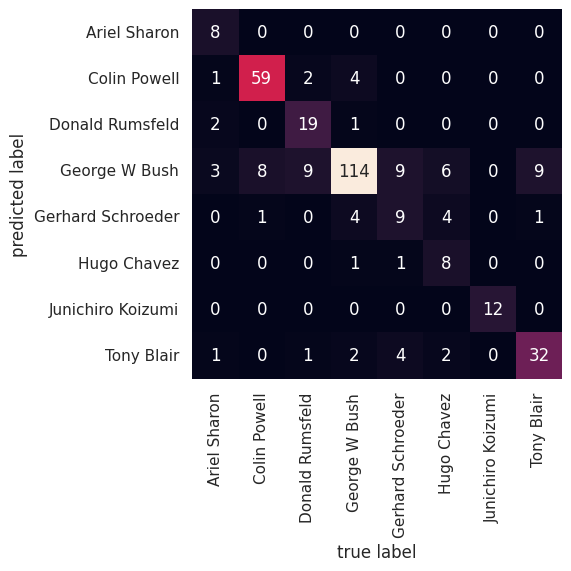

In [60]:
get_classification_report(faces.target_names, ytrain, y_train_pred[:,0], ytest, y_test_pred[:,0])

Сравните результаты моделей на выборке "распознавание лиц":
    -
    -

Сравните модель из "коробки" и модель с параметрами.

TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00       168
           2       1.00      1.00      1.00        90
           3       1.00      1.00      1.00       404
           4       1.00      1.00      1.00        86
           5       1.00      1.00      1.00        51
           6       1.00      1.00      1.00        48
           7       1.00      1.00      1.00       102

    accuracy                           1.00      1011
   macro avg       1.00      1.00      1.00      1011
weighted avg       1.00      1.00      1.00      1011

TEST

              precision    recall  f1-score   support

           0       0.78      0.47      0.58        15
           1       0.78      0.78      0.78        68
           2       0.75      0.48      0.59        31
           3       0.68      0.91      0.78       126
           4       0.58      0.48      0.52        23
           

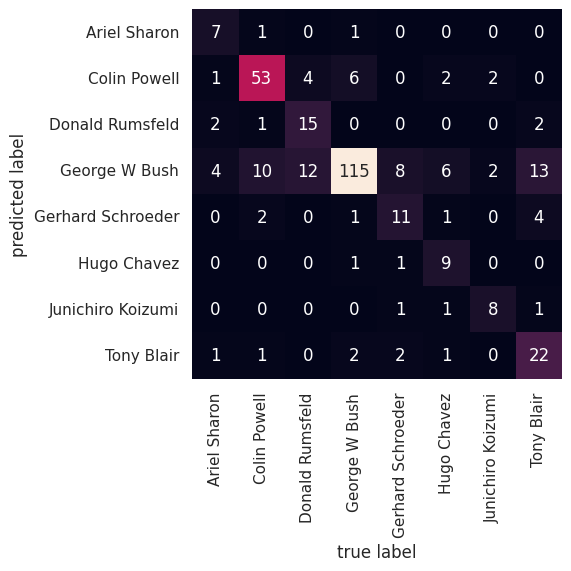

In [54]:

final_model = catb.CatBoostClassifier(n_estimators=2, max_depth=2, learning_rate=0.01, silent=True)  # модель с параметрами

model_catb.fit(pca.transform(Xtrain), ytrain)  # обучение

y_train_pred = model_catb.predict(pca.transform(Xtrain))
y_test_pred = model_catb.predict(pca.transform(Xtest))

get_classification_report(faces.target_names, ytrain, y_train_pred, ytest, y_test_pred)

### **Задание 6.**

Самостоятельно оценить данные по варианту из 5. с использованием моделей на основе ансамблей (случайный лес, градиентный бустинг) из пакетов sklearn, XGBoost, LightGMM, CATBoost

6.1 Построить модели

6.2 сравнить результаты


Вопросы для контроля:

  1. Что такое «проблема мультиколлинеарности» в задачах многомерной линейной регрессии? Возникает ли она для регрессии на деревьях.
  2. Какие критерии информативности используются при синтезе решающего дерева и почему?
  3. Достоинства и недостатки решающих деревьев.
  4. Зачем делается редукция решающих деревьев?
  5. Основная идея алгоритма СART?
  6. Как происходит перебор в жадном алгоритме синтеза дерева?
  7. Какой алгоритм строит дерево минимальной высоты?
  8. Как сказывается увеличение глубины дерева на качестве анализа новых объектов
  9. Как сократить перебор при построении дерева
  10. перечислите критерии останова